In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except Exception:
    pass

DATA_DIR = Path('.')
INPUT_FILE = DATA_DIR / '/content/Assessment Data.xlsx'
SAMPLE_FILE = DATA_DIR / 'sample_data.csv'
OUT_DIR = DATA_DIR / 'outputs'
OUT_DIR.mkdir(exist_ok=True)

df = pd.read_excel(INPUT_FILE)
df.head()


,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,pips,reason,volume,profit
0,11173702,47345780,XAUUSD,Buy,2024.07.30 11:05:29,2024-07-31 07:58:09,2391.28,2420.69,2367.62,2420.64,2936.0,4,190,5578.40
1,11173702,47718163,XAUUSD,Buy,2024.07.31 09:46:04,2024-07-31 21:42:15,2421.81,2431.41,2399.23,2431.41,960.0,4,200,1920.00
2,11173702,50360070,XAUUSD,Sell,2024.08.13 13:03:27,2024-08-14 15:24:08,2460.93,2472.80,2480.93,2451.37,-1199.0,0,200,-2398.00
3,11173702,51120570,XAUUSD,Buy,2024.08.19 13:27:40,2024-08-19 16:37:12,2495.80,2485.65,2485.71,2508.16,-1012.0,3,190,-1922.80
4,11173702,52180073,XAUUSD,Sell,2024.08.28 02:30:32,2024-08-28 15:29:39,2526.53,2496.42,2537.07,2496.82,2971.0,4,189,5615.19


**Understand the structure:**

In [ ]:
df.columns = [c.strip().lower() for c in df.columns]
print("Columns:", df.columns.tolist())
df.info()


Columns: ['login', 'ticket', 'symbol', 'type', 'open_time', 'close_time', 'open_price', 'close_price', 'stop loss', 'take profit', 'pips', 'reason', 'volume', 'profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59317 entries, 0 to 59316
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   login        59317 non-null  int64  
 1   ticket       59317 non-null  int64  
 2   symbol       59317 non-null  object 
 3   type         59317 non-null  object 
 4   open_time    59317 non-null  object 
 5   close_time   59317 non-null  object 
 6   open_price   59317 non-null  float64
 7   close_price  59317 non-null  float64
 8   stop loss    59317 non-null  float64
 9   take profit  59317 non-null  float64
 10  pips         59317 non-null  float64
 11  reason       59317 non-null  int64  
 12  volume       59317 non-null  int64  
 13  profit       59317 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usa

**Validate data health:**

In [ ]:
# Date parsing, Numeric coercion
for c in ['open_time', 'close_time']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

num_cols = ['open_price', 'close_price', 'pips', 'volume', 'profit']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

display(df.describe(include='all'))


,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,pips,reason,volume,profit
count,5.931700e+04,5.931700e+04,59317,59317,59317,59317,59317.000000,59317.000000,59317.000000,5.931700e+04,5.931700e+04,59317.000000,59317.000000,59317.000000
unique,NaN,NaN,63,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,XAUUSD,Buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,28887,25647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.274373e+07,4.820009e+07,NaN,NaN,2024-12-11 19:28:21.400222464,2024-08-18 01:48:00.885260544,9247.848230,9249.311204,6119.568535,4.895936e+03,1.115243e+02,7.236711,176.008463,22.606170
min,1.117370e+07,7.631230e+05,NaN,NaN,2024-07-01 14:32:05,1970-01-01 00:00:00,0.308400,0.325050,0.000000,0.000000e+00,-1.465680e+06,0.000000,1.000000,-12250.000000
25%,1.318703e+07,2.785692e+07,NaN,NaN,2024-11-12 15:02:44,2024-11-12 00:15:01,70.730000,70.940000,0.000000,0.000000e+00,-1.890000e+02,1.000000,20.000000,-102.000000
50%,1.327834e+07,5.709664e+07,NaN,NaN,2024-12-20 13:19:03,2024-12-20 05:51:50,2645.190000,2645.790000,1.248030,9.317200e-01,7.200000e+00,4.000000,51.000000,2.000000
75%,1.340079e+07,7.241683e+07,NaN,NaN,2025-01-21 10:10:37,2025-01-21 08:45:29,2755.480000,2755.220000,2667.400000,2.648650e+03,2.430000e+02,16.000000,150.000000,81.860000
max,2.145732e+09,8.051714e+07,NaN,NaN,2025-02-03 09:38:20,2025-02-03 09:39:39,109111.000000,108304.000000,442230.000000,1.085760e+06,1.560000e+06,17.000000,100000.000000,19061.100000


**Missing values and duplicates:**

In [ ]:
if 'profit' in df.columns:
    df['profit'] = df['profit'].fillna(0.0)

if 'volume' in df.columns:
    med_vol = df['volume'].median()
    df['volume'] = df['volume'].fillna(med_vol)

# Calculate If pips are missing but open/close price is available:
if set(['open_price','close_price']).issubset(df.columns) and 'pips' in df.columns:
    mask = df['pips'].isna() & df['open_price'].notna() & df['close_price'].notna()
    df.loc[mask, 'pips'] = (df.loc[mask, 'close_price'] - df.loc[mask, 'open_price']).abs() * 10000


for c in ['symbol', 'type']:
    if c in df.columns:
        mode_val = df[c].mode().iloc[0] if not df[c].mode().empty else "Unknown"
        df[c] = df[c].fillna(mode_val)
#Cleaning capitalization issues:

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()        # remove leading/trailing spaces
    df[col] = df[col].str.title()        # Make "buy" -> "Buy", "sell" -> "Sell"
    # Alternatively: df[col] = df[col].str.upper() if you prefer all caps


print("The missing values after cleaning are:")
print(df.isna().sum())


The missing values after cleaning are:
login          0
ticket         0
symbol         0
type           0
open_time      0
close_time     0
open_price     0
close_price    0
stop loss      0
take profit    0
pips           0
reason         0
volume         0
profit         0
dtype: int64


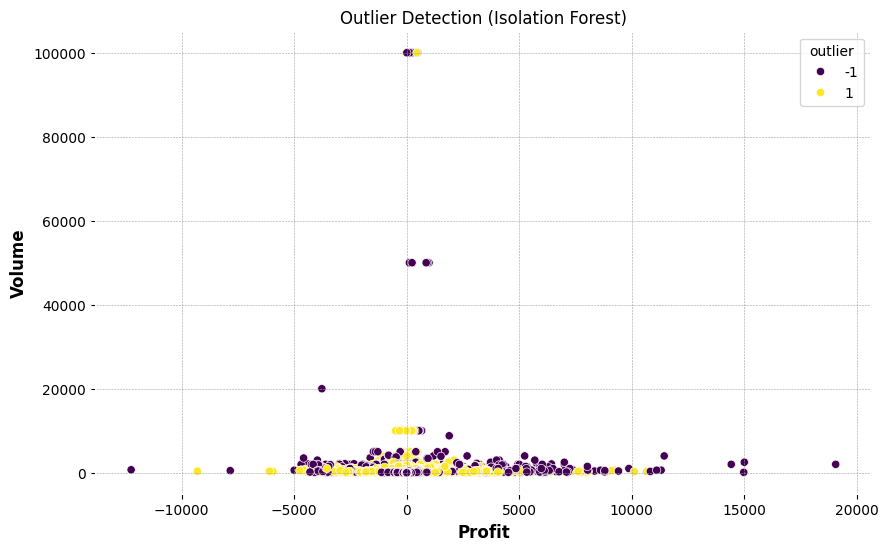

Number of outliers detected: 8315


In [40]:
from sklearn.ensemble import IsolationForest

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    if np.isinf(df[col]).any():
        print(f"Warning: Infinite values found in column '{col}'. Replacing with NaN.")
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)

df_cleaned_for_outliers = df.dropna(subset=numerical_cols)

iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(df_cleaned_for_outliers[numerical_cols])

# Predict outliers (-1 for outliers, 1 for inliers)
outliers = iso_forest.predict(df_cleaned_for_outliers[numerical_cols])

# Add outlier status to the dataframe
df_cleaned_for_outliers['outlier'] = outliers

# Visualize outliers
if 'profit' in df_cleaned_for_outliers.columns and 'volume' in df_cleaned_for_outliers.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='profit', y='volume', hue='outlier', data=df_cleaned_for_outliers, palette='viridis')
    plt.title('Outlier Detection (Isolation Forest)')
    plt.xlabel('Profit')
    plt.ylabel('Volume')
    plt.show()
else:
    print("Required columns 'profit' or 'volume' not found for visualization.")


print(f"Number of outliers detected: {len(df_cleaned_for_outliers[df_cleaned_for_outliers['outlier'] == -1])}")

In [ ]:
#Save cleaned data:
cleaned_path = OUT_DIR / 'new_cleaned_data.csv'
df.to_csv(cleaned_path, index=False)
df = pd.read_csv(cleaned_path)
df.head()

,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,pips,reason,volume,profit
0,11173702,47345780,Xauusd,Buy,2024-07-30 11:05:29,2024-07-31 07:58:09,2391.28,2420.69,2367.62,2420.64,2936.0,4,190,5578.40
1,11173702,47718163,Xauusd,Buy,2024-07-31 09:46:04,2024-07-31 21:42:15,2421.81,2431.41,2399.23,2431.41,960.0,4,200,1920.00
2,11173702,50360070,Xauusd,Sell,2024-08-13 13:03:27,2024-08-14 15:24:08,2460.93,2472.80,2480.93,2451.37,-1199.0,0,200,-2398.00
3,11173702,51120570,Xauusd,Buy,2024-08-19 13:27:40,2024-08-19 16:37:12,2495.80,2485.65,2485.71,2508.16,-1012.0,3,190,-1922.80
4,11173702,52180073,Xauusd,Sell,2024-08-28 02:30:32,2024-08-28 15:29:39,2526.53,2496.42,2537.07,2496.82,2971.0,4,189,5615.19


In [ ]:
#Profitability analysis
if 'login' in df.columns and 'profit' in df.columns:
    profit_by_login = df.groupby('login', as_index=False)['profit'].sum().sort_values('profit', ascending=False)
    profit_by_login.to_csv(OUT_DIR / 'profit_by_login.csv', index=False)
    print("Saved profit_by_login.csv")
    display(profit_by_login.head(20))
else:
    print("ERROR: required columns 'login' and 'profit' not found.")


Saved profit_by_login.csv


,login,profit
396,13378390,53891.98
511,55009560,28475.44
50,13088202,27848.61
146,13205503,27049.34
40,13070589,27023.68
498,55008451,27021.14
147,13205506,26494.85
370,13361147,25136.16
0,11173702,24301.54
519,55010677,24265.33


**Visualizations**

/tmp/ipython-input-2131421858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_per_login.sort_values('profit', ascending=False).head(10),


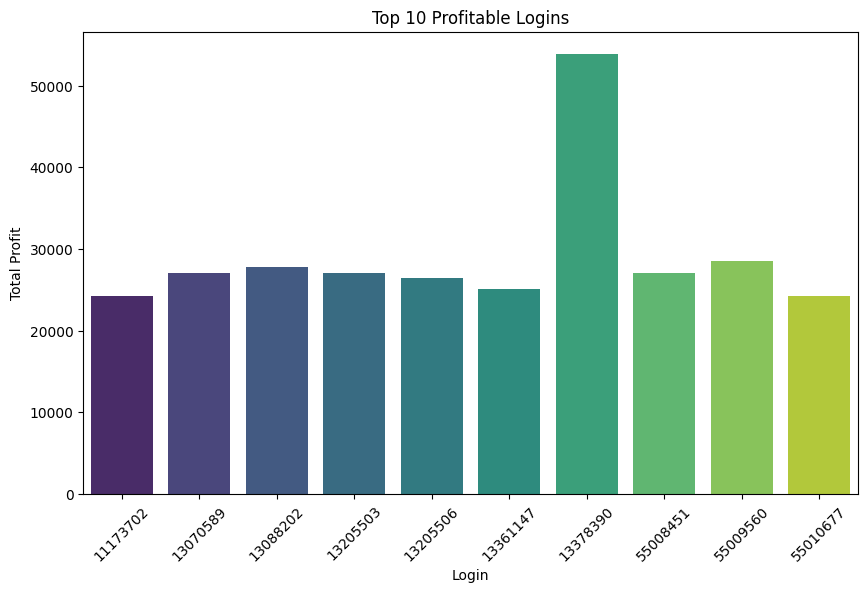

In [ ]:
#Aggregate profit per login
import seaborn as sns
profit_per_login = df.groupby('login')['profit'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=profit_per_login.sort_values('profit', ascending=False).head(10),
            x='login', y='profit', palette="viridis")
plt.title("Top 10 Profitable Logins")
plt.xlabel("Login")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()


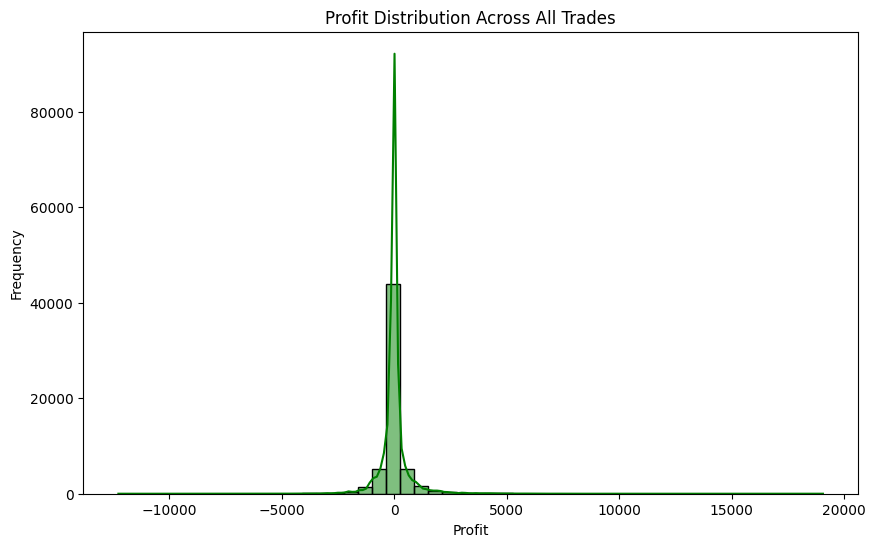

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['profit'], bins=50, kde=True, color='Green')
plt.title("Profit Distribution Across All Trades")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-711410345.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_type, x='type', y='profit', palette="coolwarm")


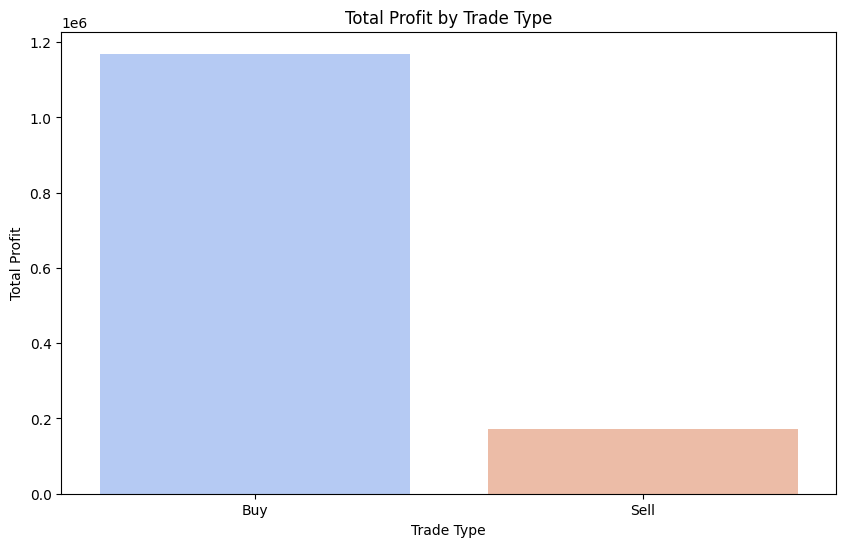

In [ ]:
#Type vs profit chart
import seaborn as sns
import matplotlib.pyplot as plt


profit_by_type = df.groupby('type')['profit'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=profit_by_type, x='type', y='profit', palette="coolwarm")
plt.title("Total Profit by Trade Type")
plt.xlabel("Trade Type")
plt.ylabel("Total Profit")
plt.show()


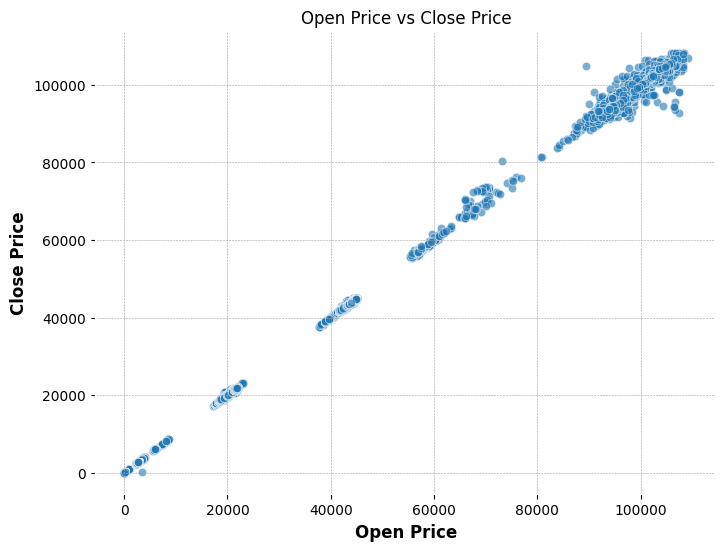

In [36]:
#scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='open_price', y='close_price', data=df, alpha=0.6)
plt.title("Open Price vs Close Price")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()


In [43]:
import pkg_resources

# Get a list of all installed packages
installed_packages = {pkg.key: pkg for pkg in pkg_resources.working_set}

# Get a list of imported modules (including built-ins)
imported_modules = set(sys.modules.keys())

# Filter for installed packages that were imported
used_installed_packages = {name: installed_packages[name] for name in imported_modules if name in installed_packages}

# Generate requirements.txt content
requirements = []
for pkg_key, pkg in used_installed_packages.items():
    try:
        version = pkg.version
        requirements.append(f"{pkg_key}=={version}")
    except Exception:
        # Handle cases where version might not be easily accessible
        requirements.append(pkg_key) # Just include the package name if version is tricky

# Add explicitly imported packages that might not be in sys.modules keys easily (e.g., matplotlib parts)
explicit_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'sklearn', 'xlrd'] # Add other packages used explicitly
for pkg_name in explicit_packages:
    try:
        pkg = pkg_resources.get_distribution(pkg_name)
        requirements.append(f"{pkg.key}=={pkg.version}")
    except pkg_resources.DistributionNotFound:
        requirements.append(pkg_name) # Add package name even if not found

# Remove duplicates and sort
requirements = sorted(list(set(requirements)))


# Write to requirements.txt
requirements_path = OUT_DIR / 'requirements.txt'
with open(requirements_path, 'w') as f:
    for req in requirements:
        f.write(f"{req}\n")

print(f"requirements.txt generated at {requirements_path}")

/tmp/ipython-input-176126583.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


requirements.txt generated at outputs/requirements.txt
